# MinMaxScaler

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jar = pd.read_csv('clean_data.csv')

fdVals = jar['FD'].unique()

hi_fd = jar[jar['FD'] == fdVals[-1]]
hi_fd = hi_fd.drop(['FD', 'fuel_gas_swelling'], axis=1)

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
feat_ind = list(range(7))
features = hi_fd.iloc[:, feat_ind]
xscaler = MinMaxScaler()
xscaler.fit(features)

MinMaxScaler()

# Load MCMC samples

In [5]:
hey1 = np.load('smpl1.npy')
hey2 = np.load('smpl2.npy')

In [6]:
zeros = np.zeros((100001, 4))

heyy1 = np.concatenate((hey1, zeros), axis=1)
heyy2 = np.concatenate((hey2, zeros), axis=1)

orig1 = xscaler.inverse_transform(heyy1)
orig2 = xscaler.inverse_transform(heyy2)

In [7]:
shey = np.concatenate((hey1[::100], hey2[::100]))
sheyy = np.concatenate((heyy1[::100], heyy2[::100]))
sorig = np.concatenate((orig1[::100], orig2[::100]))

# IUQ

In [8]:
rcupd = {
    'figure.figsize': (5, 4),
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm',
    'font.size': 12,
}
plt.rcParams.update(rcupd)

<Figure size 1000x800 with 0 Axes>

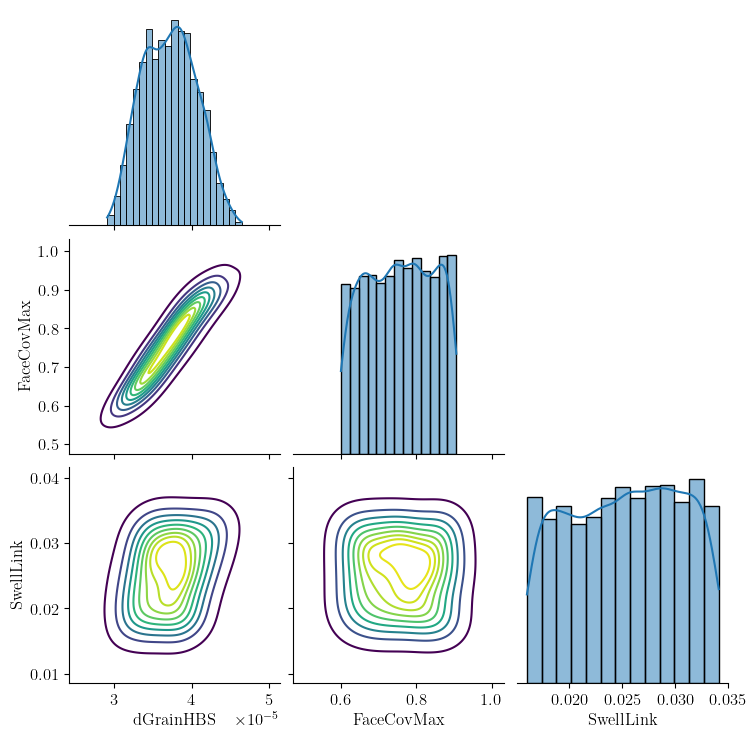

In [9]:
dforig = pd.DataFrame(sorig[:,:3], columns=['dGrainHBS', 'FaceCovMax', 'SwellLink'])

plt.figure(figsize=(10, 8))
sns.pairplot(
    pd.DataFrame(dforig),
    diag_kind='hist',
    diag_kws=dict(kde=True),
    plot_kws=dict(cmap='viridis', bw_adjust=1.7),
    kind='kde',
    corner=True
)

plt.show()

<Axes: >

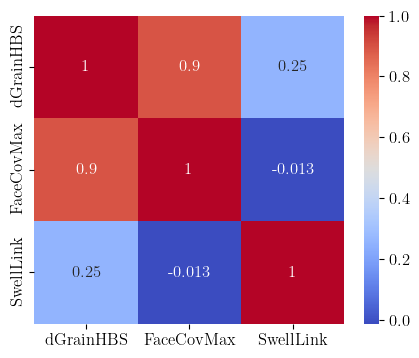

In [10]:
sns.heatmap(dforig.corr(), annot=True, cmap='coolwarm')

# Mean, dev, cred. interval

In [11]:
dforig.describe()

,dGrainHBS,FaceCovMax,SwellLink
count,2002.000000,2002.000000,2002.000000
mean,0.000037,0.757332,0.025285
std,0.000003,0.088211,0.005219
min,0.000029,0.600302,0.016020
25%,0.000034,0.679342,0.020718
50%,0.000037,0.756288,0.025464
75%,0.000040,0.833184,0.029713
max,0.000046,0.906452,0.034126


In [12]:
#dforig.mean()
for i in range(3):
    print(np.mean(dforig.iloc[:, i]),
          np.mean(dforig.iloc[:, i]))

3.7180413580954836e-05 3.7180413580954836e-05
0.7573317078325144 0.7573317078325144
0.02528464978586465 0.02528464978586465


In [13]:
#dforig.std()
for i in range(3):
    print(np.std(dforig.iloc[:, i]),
          np.std(dforig.iloc[:, i]))

3.42262691791727e-06 3.42262691791727e-06
0.08818861376285435 0.08818861376285435
0.00521813492779212 0.00521813492779212


In [14]:
for i in range(3):
    print(np.percentile(dforig.iloc[:, i], 2.5),
          np.percentile(dforig.iloc[:, i], 97.5))

3.113581181608032e-05 4.371671314651349e-05
0.6086006811951147 0.8994896621031482
0.01658638321916072 0.03369261147393427
